<a href="https://colab.research.google.com/github/V1PASH/PYTORCH/blob/main/02_neural_networks_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with pytorch

Classification is a problem of predicting wheather something is one thing or another (there can be multiple things as the options)



In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1.0 make a classification data and get ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

n_samples=1000

x,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(x),len(y)

(1000, 1000)

In [ ]:
x[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [ ]:
y[:5]

array([1, 1, 1, 1, 0])

In [ ]:
print(f"5 samples x{x[:5]}")
print(f"5 samples y {y[:5]}")

5 samples x[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
5 samples y [1 1 1 1 0]


In [ ]:
import pandas as pd
circles=pd.DataFrame({"x1":x[:,0],"x2":x[:,1],"label":y})

In [ ]:
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


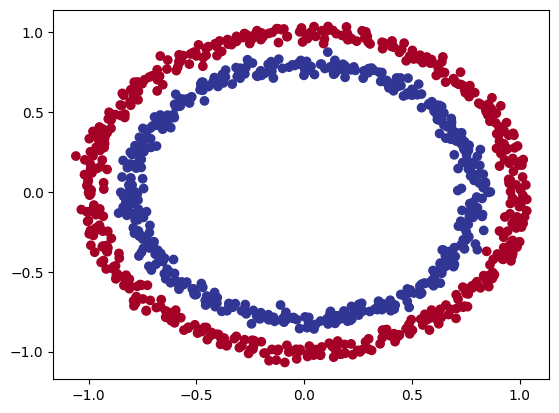

In [ ]:
#Visualize Visulize Visulise

plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

**Note**: the data we are working with is often called toy datase a dataset that is small enough to experiment but still sizeable enough to practice the fundamentas

### 1.1 Cheak input and output shapes

In [ ]:
x.shape,y.shape

((1000, 2), (1000,))

In [ ]:
#view the first example of features and labels

print(f"sample x : {x[0]}, y sample y : {y[0]}")

sample x : [0.75424625 0.23148074], y sample y : 1


###1.2 Turn data into Tensors create and test splits

In [ ]:
# turn datai into tensors

x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
x.dtype,x,y.dtype,y[10]

(torch.float32,
 tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         ...,
         [-0.1369, -0.8100],
         [ 0.6704, -0.7675],
         [ 0.2811,  0.9638]]),
 torch.float32,
 tensor(1.))

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.2,# 20 %will be test
                                               random_state=42 )

In [ ]:
len(x_train),len(x_test)

(800, 200)

In [ ]:
n_samples

1000

## 2.0 Building a model

Lets build a model to classify red and blue dot

1. setup Device Agnostic code
2. Consstruct a model (subclass `nn.Module`)
3. Define a loss function and optimizer
4. create a testing and training loop

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Now we setup device agnostic code lets create a model that:
1. subclass `nn.Module` (almost all model subclass `nn.Module`)
2. Create 2`nn.Linear()` layer that are capable of handling the shapes of our data
3. define a `forward() ` method that outlines that forward pass of the model
4. Instatiate an instance of our model class and senf it to the target device


In [ ]:
# constrcut a model

class CirclesModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.Layer1=nn.Linear(in_features=2,out_features=5)
    self.Layer2=nn.Linear(in_features=5,out_features=1)

  def forward(self,x): #forward pass
    return self.Layer2(self.Layer1(x)) # x -> layer1 -> layer2 -> output

model_0=CirclesModelV1().to(device)

In [ ]:
model_0

CirclesModelV1(
  (Layer1): Linear(in_features=2, out_features=5, bias=True)
  (Layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
#Lets replicate model above using nn.Sequential

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

In [ ]:
#make predictions
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5731,  0.6986],
                      [ 0.1169,  0.2596],
                      [ 0.3169,  0.2263],
                      [ 0.4087, -0.3467],
                      [-0.3821,  0.0364]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.1221,  0.6735, -0.3150,  0.6286, -0.2491], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0445,  0.3365, -0.4441, -0.4097, -0.3221]], device='cuda:0')),
             ('1.bias', tensor([-0.1270], device='cuda:0'))])

In [ ]:
with torch.inference_mode():
  untrained_preds=model_0(x_test.to(device))

print(f"length of pres {len(untrained_preds)}  ,shape of preds {untrained_preds.shape}")
print(f"length of test {len(x_test)}, shape{x_test.shape} ")
print(f" first 10 preds {untrained_preds[:10]}")

length of pres 200  ,shape of preds torch.Size([200, 1])
length of test 200, shapetorch.Size([200, 2]) 
 first 10 preds tensor([[ 0.1798],
        [ 0.1368],
        [ 0.1500],
        [ 0.1889],
        [-0.0762],
        [-0.1007],
        [-0.0425],
        [-0.0987],
        [ 0.1596],
        [ 0.1314]], device='cuda:0')


### 2.1 setup loss and optimizer

Which loss or optimizer to use ?

it's is Problem specific


For regression you minght want MAE or MSE (mean absolute error or mean Squared error)

For classification you might want binary cross entropy or categorical cross entropy

as a remider the loss fn measure how wrong the Predictions are



most common optimizers  SGD and Adam


* For loss function `torch.nn.BCEWithLogitsLoss()`

* `torch.optim` for optimizers


In [ ]:
loss_fn=torch.nn.BCEWithLogitsLoss() #BCEWithLogitLoss --- this has sigmoid activation function in it

optim=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [ ]:
# how accurate the model is -- out of 100 how many we get right

def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc =(correct/len(y_pred))*100
  return acc

## 3.0 Train model

we have to  build a training loop

* model train mode

1. Do a forward pass
2. calculate loss
3. optimizer zero grad
4. loss backward
5. optimizer step



#### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outputs are going to be raw **logits**.

we can convert  these **logits** into **prediction probabilities** by passing them to some of activation function  (e.g sigmoid for binary classification and softmax for multiclass classification)

then we can conver our models predictions to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
#view the first five outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(x_test.to(device))[:5]

In [ ]:
y_logits

tensor([[ 0.1798],
        [ 0.1368],
        [ 0.1500],
        [ 0.1889],
        [-0.0762]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

#### for our orediction probability values we need to perform a range style rouding in them
* `y_preds_probs` >=0.5 `y=1` (Class1)
* `y_preds_probs` <0.5 `y=0` (class2)

In [ ]:
# use the sigmoid activation function on our models logirs

y_preds_probs=torch.sigmoid(y_logits)
y_preds_probs

tensor([[0.5448],
        [0.5342],
        [0.5374],
        [0.5471],
        [0.4810]], device='cuda:0')

In [ ]:
torch.round(y_preds_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [0.]], device='cuda:0')

In [ ]:
y_preds=torch.round(y_preds_probs)
y_pred_labels=torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([1., 1., 1., 1., 0.], device='cuda:0')

### 3.2 Building an training and test loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

for epoch in range(epochs):

  model_0.train()
  # 1 forward pass
  y_logits=model_0(x_train.to(device)).squeeze()

  y_preds=torch.round(torch.sigmoid(y_logits))

  # 2 calculate the loss / accuracy

  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train,y_pred=y_preds)

  # 3 optimizer zero grad

  optim.zero_grad()

  # 4 loss baclward

  loss.backward()

  #5 optim step

  optim.step()

  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass

    test_logits = model_0(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Caculate loss/accuracy

    test_loss = loss_fn(test_logits,
                            y_test)

    test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69539, Accuracy: 50.12% | Test loss: 0.69536, Test acc: 55.00%
Epoch: 10 | Loss: 0.69531, Accuracy: 50.25% | Test loss: 0.69532, Test acc: 54.50%
Epoch: 20 | Loss: 0.69524, Accuracy: 50.00% | Test loss: 0.69528, Test acc: 54.00%
Epoch: 30 | Loss: 0.69517, Accuracy: 49.88% | Test loss: 0.69525, Test acc: 53.50%
Epoch: 40 | Loss: 0.69511, Accuracy: 49.88% | Test loss: 0.69521, Test acc: 53.50%
Epoch: 50 | Loss: 0.69505, Accuracy: 49.88% | Test loss: 0.69518, Test acc: 53.50%
Epoch: 60 | Loss: 0.69499, Accuracy: 49.88% | Test loss: 0.69516, Test acc: 53.50%
Epoch: 70 | Loss: 0.69493, Accuracy: 49.62% | Test loss: 0.69513, Test acc: 53.50%
Epoch: 80 | Loss: 0.69488, Accuracy: 49.75% | Test loss: 0.69511, Test acc: 53.50%
Epoch: 90 | Loss: 0.69483, Accuracy: 49.75% | Test loss: 0.69509, Test acc: 53.50%


## 4.0 Make prediction and evaluate the model

from the matrices it looks like he model isnt learning anything

so to inspect it lets make some predictions and visualise them


to do so we will import `plot_decision_boundary()`

In [ ]:
import requests

from pathlib import Path

# download helper function from pytorch repo

if Path("helper_function.py").is_file():
  print("have")
else:
  print("download")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb")as f:
    f.write(request.content)

download


In [ ]:
from helper_functions import plot_predictions ,plot_decision_boundary

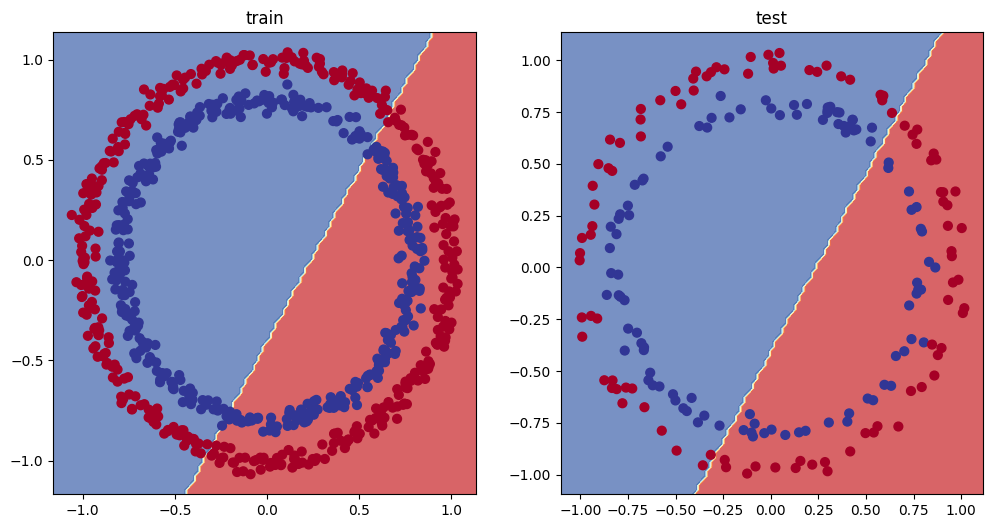

In [ ]:
#plot decision boundery of model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_0,x_test,y_test)


## 5.0 Improving a model (from a model perspective)


* Add more layers - give model more chances to learn about patterns in the data
* Add more hidden units -- fo from 5 hidden units to 10 units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from the models perspective cause they deal with model rathen than the data


and cause these options are all values we can chaneg as a mchine learning engineer and data scientist can change the are reffered as **hyperparameters**.


lets imporve our model by

* adding more layers 2->3
* adding more hidden unite 5->10
* increase the epochs  100->1000

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5723,  0.6987],
                      [ 0.1232,  0.2584],
                      [ 0.3085,  0.2280],
                      [ 0.4009, -0.3452],
                      [-0.3883,  0.0376]])),
             ('0.bias', tensor([ 0.1226,  0.6698, -0.3101,  0.6331, -0.2455])),
             ('1.weight',
              tensor([[-0.0375,  0.3305, -0.4355, -0.4076, -0.3269]])),
             ('1.bias', tensor([-0.1380]))])

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))


model_1=CircleModelV1().to(device)


In [ ]:
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#create a loss function
loss_fn=torch.nn.BCEWithLogitsLoss()

# create a optimizer

optim=torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [ ]:
torch.manual_seed(42)

torch.cuda.manual_seed(42)

epochs=1000

x_train,y_train=x_train.to(device),y_train.to(device)
x_test,y_test=x_test.to(device),y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_logits=model_1(x_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logits.to(device)))

 #calculate loss
  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  # optimizer zero grad
  optim.zero_grad()

  #loss backward
  loss.backward()

  # optimizer step
  optim.step()

  model_1.eval()

  with torch.inference_mode():
    test_logits=model_1(x_test).squeeze()
    test_preds=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_preds)

  if epoch %100==0:
    print(f" epoch {epoch} | loss {loss:.5f} ,acc {acc:.2f} | test loss {test_loss:.5f} test acc {test_acc:.2f}%")


 epoch 0 | loss 0.69396 ,acc 50.88 | test loss 0.69261 test acc 51.00%
 epoch 100 | loss 0.69392 ,acc 50.50 | test loss 0.69261 test acc 51.00%
 epoch 200 | loss 0.69389 ,acc 50.62 | test loss 0.69262 test acc 50.50%
 epoch 300 | loss 0.69386 ,acc 50.62 | test loss 0.69263 test acc 50.50%
 epoch 400 | loss 0.69383 ,acc 50.62 | test loss 0.69263 test acc 51.00%
 epoch 500 | loss 0.69381 ,acc 50.75 | test loss 0.69264 test acc 50.50%
 epoch 600 | loss 0.69378 ,acc 50.62 | test loss 0.69265 test acc 51.00%
 epoch 700 | loss 0.69376 ,acc 50.25 | test loss 0.69266 test acc 51.00%
 epoch 800 | loss 0.69373 ,acc 50.00 | test loss 0.69267 test acc 50.50%
 epoch 900 | loss 0.69371 ,acc 49.88 | test loss 0.69268 test acc 50.50%


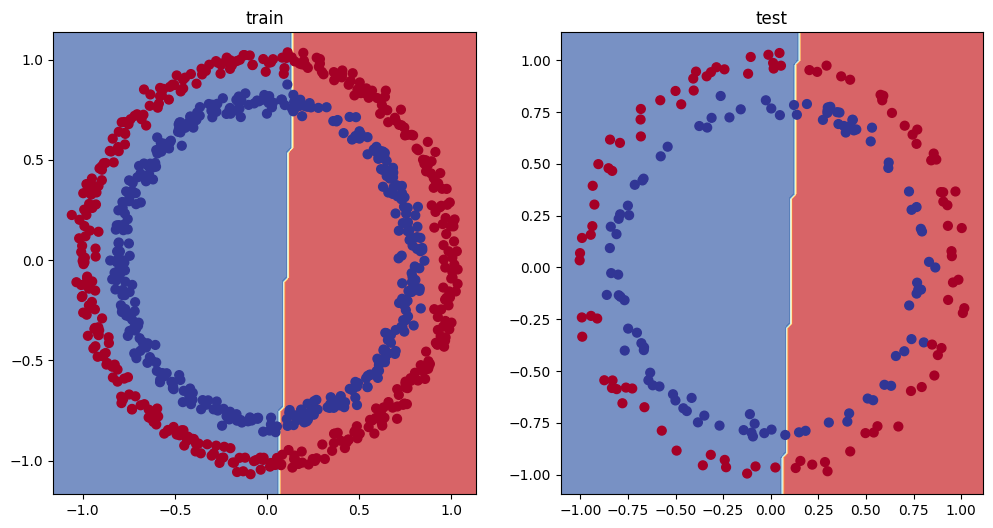

In [ ]:
#plot the deicion boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_1,x_test,y_test)


### 5.1 preparing data to see if our model an fit a straight line

One way to troubleshoot to a larger problen is to test out smaller problem

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


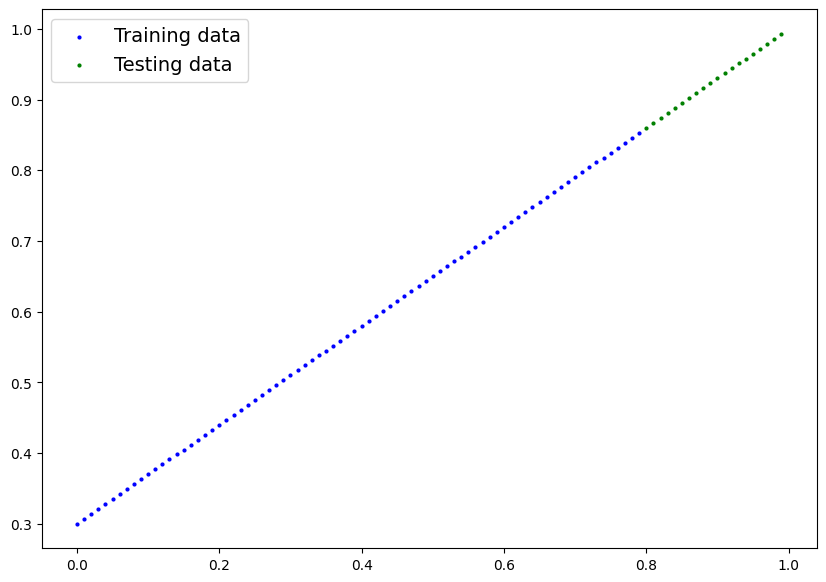

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
)

In [ ]:
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

### 5.2 adjusting `model_1` to fit straight line

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01)

In [ ]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set the number of epochs
epochs = 1000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass

    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)

    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()

    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


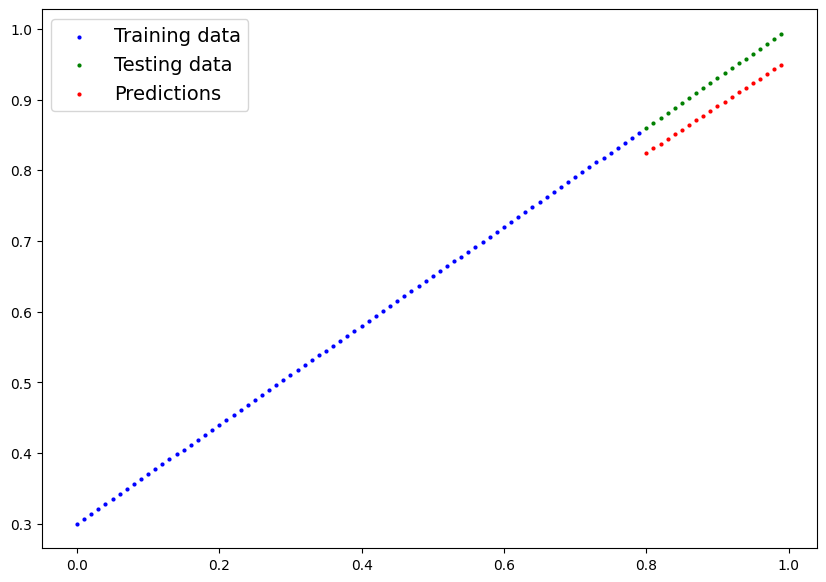

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6.0 The Missing piece : non-linearity

"what pattern could you draw if you were given infinite linear and non linear lines ?"

### 6.1 Recreating non linear data (red and blue circles)

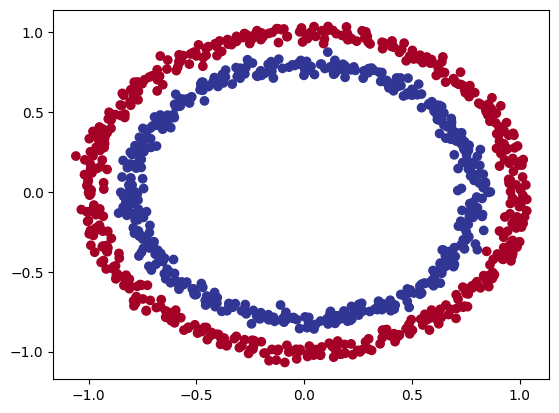

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import  make_circles

n_samples=1000

x,y=make_circles(n_samples,noise=0.03,
                 random_state=42)

plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
# convert data to tesnotrs and then split test

x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### 6.2 Building a model with non Linearity

* linear -- straight line
* non linear -- non straight lines

In [ ]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=15)
    self.layer3=nn.Linear(in_features=15,out_features=10)
    self.layer4=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU() # non linear activation function

  def forward(self,x):
    # where to put our non liner function ?
    return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))


model_3=CircleModelV2()


In [ ]:
model_3.to(device)

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=15, bias=True)
  (layer3): Linear(in_features=15, out_features=10, bias=True)
  (layer4): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
with torch.inference_mode():
  y_pred=model_3(x_test.to(device))

In [ ]:
y_pred[:5]

tensor([[0.0749],
        [0.0868],
        [0.0756],
        [0.0791],
        [0.0864]], device='cuda:0')

In [ ]:
loss_fn=torch.nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.03)

In [ ]:
x_train,x_test,y_train,y_test=x_train.to(device),x_test.to(device),y_train.to(device),y_test.to(device)

### 6.3 training with non linearity

In [ ]:
## training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train,x_test,y_train,y_test=x_train.to(device),x_test.to(device),y_train.to(device),y_test.to(device)

epochs=10000
model_3.to(device)
for epoch in range (epochs):

  model_3.train()

  y_logits=model_3(x_train).squeeze()

  y_pred=torch.round(torch.sigmoid(y_logits.to(device)))

  #loss

  loss=loss_fn(y_logits,y_train)

  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()


  with torch.inference_mode():
      test_logits=model_3(x_test).squeeze()
      test_pred=torch.round(torch.sigmoid(test_logits.to(device)))
      test_loss=loss_fn(test_logits,y_test)
      test_acc=accuracy_fn(y_true=y_test,
                          y_pred=test_pred)

  if epoch%1000==0:

    print(f"{epoch} ||   {loss :.5f} | {acc : .4f} || test |{test_loss : .5f} | {test_acc : .4f}")


0 ||   0.69444 |  50.0000 || test | 0.69422 |  50.0000
1000 ||   0.69174 |  56.0000 || test | 0.69163 |  55.0000
2000 ||   0.68817 |  55.7500 || test | 0.68793 |  55.0000
3000 ||   0.67506 |  57.3750 || test | 0.67349 |  56.0000
4000 ||   0.60153 |  78.8750 || test | 0.59757 |  79.0000
5000 ||   0.06481 |  100.0000 || test | 0.09738 |  99.0000
6000 ||   0.01533 |  100.0000 || test | 0.03514 |  99.5000
7000 ||   0.00814 |  100.0000 || test | 0.02419 |  99.5000
8000 ||   0.00542 |  100.0000 || test | 0.01887 |  99.5000
9000 ||   0.00399 |  100.0000 || test | 0.01608 |  99.5000


### 6.4 Evaluating a model trained with non-linear activation function

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(x_test))).squeeze()

y_test[:5],y_pred[:5]

(tensor([1., 0., 1., 0., 1.], device='cuda:0'),
 tensor([1., 0., 0., 0., 1.], device='cuda:0', grad_fn=<SliceBackward0>))

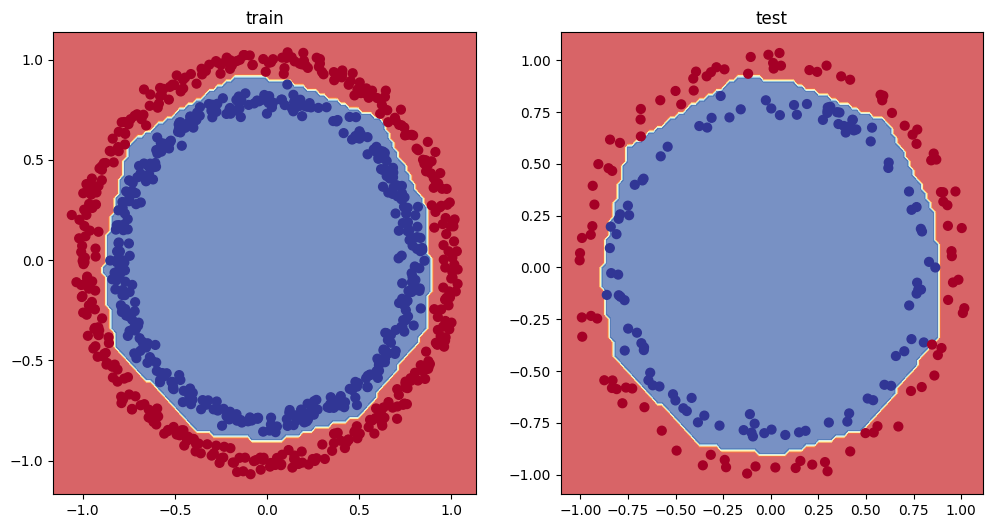

In [ ]:
#plot the deicion boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("train")
plot_decision_boundary(model_3,x_train,y_train)
plt.subplot(1,2,2)
plt.title("test")
plot_decision_boundary(model_3,x_test,y_test)

## 7.0 Replicate non linear activation function

Neural network rather than us telling what to learn we give it tools to discover pattern in data and it tries to figure out

and tools are linear and non linear

In [ ]:
#create a tensor
A=torch.arange(-10,10,1,dtype=torch.float32)

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

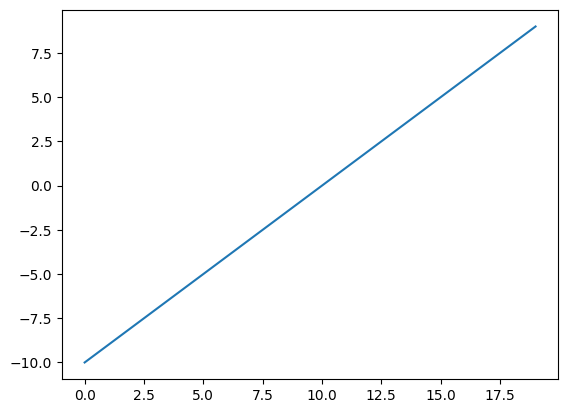

In [ ]:
#visualize this data
plt.plot(A)

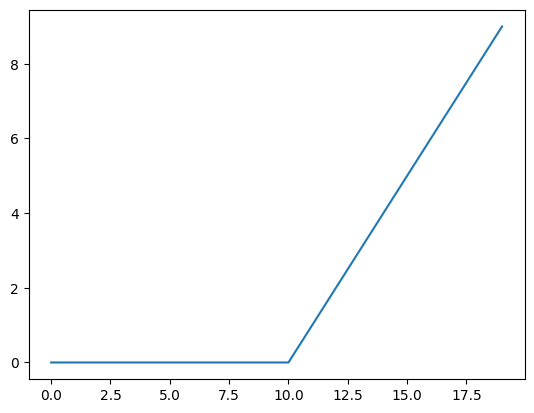

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x:torch.tensor) ->torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

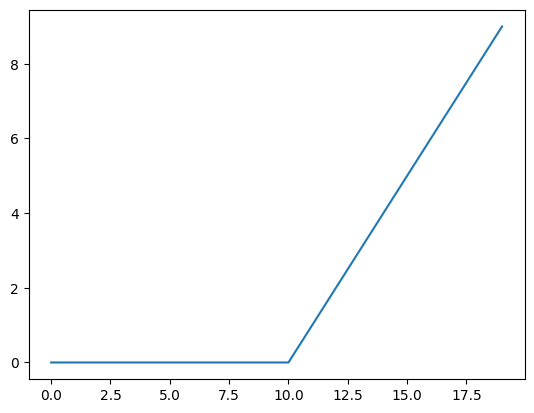

In [ ]:
#plot ReLU activation functio
plt.plot(relu(A))

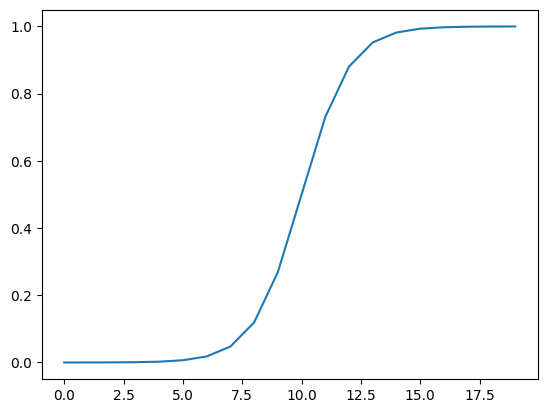

In [ ]:
# now lets do the same for sigmoid

def sigmoid(x):
  return 1 /( 1 + torch.exp(-x))

plt.plot(torch.sigmoid(A))

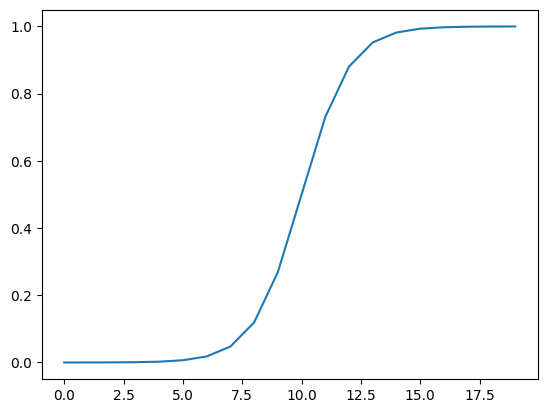

In [ ]:
plt.plot(sigmoid(A))

## Saving the model State dict

In [ ]:
from pathlib import Path

In [ ]:
model_path=Path("Circles_Model")
model_path.mkdir(parents=True,exist_ok=True)

model_name="circles_model_trained.pth"

model_save_path=model_path/model_name

torch.save(obj=model_3.state_dict(),f=model_save_path)


## 8.0 Putting it all together with multiclass classification

* binary classification = one thing or another ( eith it is the thing or not)
* multiclass classificatin = more than one thing ( cat vs dog vs chiken )

### 8.1 Creating a toy dataset

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


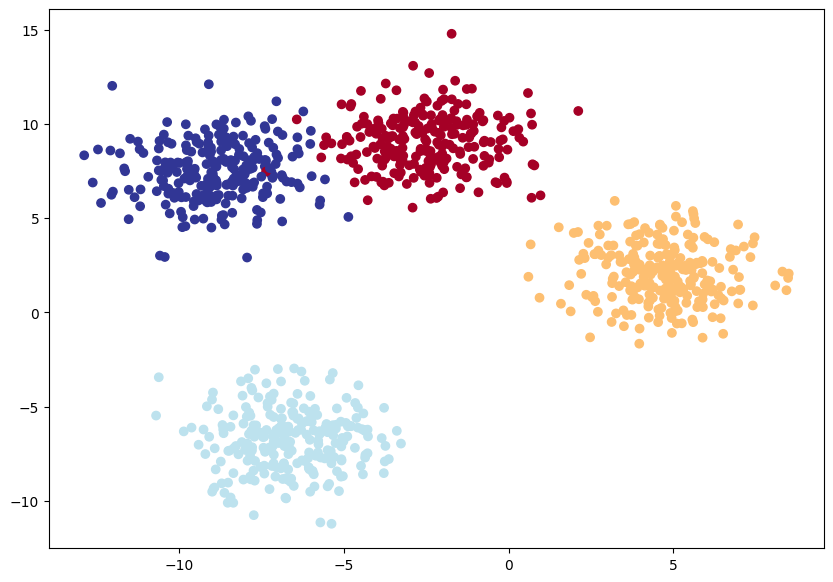

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

num_classes=4
num_features=2
random_seed=42


#1 create multi class data

x_blob,y_blob=make_blobs(n_samples=1000,
                         n_features=num_features,
                         centers=num_classes,
                         cluster_std=1.5,
                         random_state=random_seed)

# turn dat ainto tensors
x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)
print(x_blob[:5], y_blob[:5])
# split train test
x_blob_train,x_blob_test,y_blob_train,y_blob_test=train_test_split(x_blob,
                                                                   y_blob,
                                                                   test_size=0.2,
                                                                   random_state=random_seed)

# plot data

plt.figure(figsize=(10,7))
plt.scatter(x_blob[:,0],x_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### 8.2 Building a multiclass classification model in pytorch

In [ ]:
# create device agnostic code

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# build a multiclass classification
from torch import nn

class BlobModel(nn.Module):

  def __init__(self,input_features,output_features,hidden_units=8):
    """
    initialize the multiclass classficaton
    Args:
    input feautres(int): number if input fetures of model
    outup_features (int): number of outputs features of model
    Hidden_units (int): number of hidden units layer
    """
    super().__init__()

    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )
  def forward(self,x):
      return self.linear_layer_stack(x)

model4 = BlobModel(input_features=num_features,
                    output_features=num_classes,
                    hidden_units=8).to(device)
model4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
x_blob_train.shape,y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [ ]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

In [ ]:
model4=BlobModel(input_features=num_features,output_features=num_classes).to(device)

In [ ]:
model4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 loss and optimizer

In [ ]:
# loss function of multiclass classification
loss_fn=nn.CrossEntropyLoss()

#optimizer for multiclass classification
optimizer=torch.optim.SGD(params=model4.parameters(),lr=0.1)


### 8.4 Getting prediction probabilities for multiclass pytorch model

In order to evaluate and train test our model we need to conver our model outputs(logits) to prediction probabilities and then to prediction label


logits (raw output of the model )-> pred probs (use `torch.softmax` ) -> pred labels (take the argmax of the prediction probability )


In [ ]:
model4(x_blob_train.to(device))[:5]
model4(x_blob_train.to(device))[0].shape, num_classes

(torch.Size([4]), 4)

In [ ]:
# Make prediction logits with model
y_logits = model4(x_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [ ]:
model4.eval()
with torch.inference_mode():
 y_logits=model4(x_blob_test.to(device))

In [ ]:
y_logits[:5]

tensor([[ 0.7111, -0.5330,  0.3307, -0.2327],
        [-0.3420, -1.7850, -0.3224, -1.1384],
        [ 0.1878, -0.8563,  0.3375, -0.9026],
        [ 0.4513, -0.4277,  0.2498, -0.1940],
        [ 0.8922, -0.9492,  0.3245, -0.5287]], device='cuda:0')

In [ ]:
# convert models logits to prediction pribabilities'
y_pred_probs=torch.softmax(y_logits,dim=1)

In [ ]:
print(y_pred_probs[:5])

tensor([[0.4236, 0.1221, 0.2895, 0.1648],
        [0.3694, 0.0873, 0.3767, 0.1666],
        [0.3509, 0.1235, 0.4076, 0.1179],
        [0.3627, 0.1506, 0.2965, 0.1902],
        [0.5084, 0.0806, 0.2882, 0.1228]], device='cuda:0')


In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0')

In [ ]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.4236, 0.1221, 0.2895, 0.1648], device='cuda:0')
tensor(0, device='cuda:0')


In [ ]:
torch.max(y_pred_probs[0])

tensor(0.4236, device='cuda:0')

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(0, device='cuda:0')

In [ ]:
# conver prediction probabilities to pred labels

y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 2,
        2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0,
        2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2,
        0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
        2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
        2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0,
        2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0,
        0, 2, 2, 0, 2, 0, 2, 0], device='cuda:0')

### 8.5 create a training and testing loop for multiclass pytorch model

In [ ]:
y_blob_train[:5]

tensor([1, 0, 2, 2, 0])

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 0

# Put data to target device
X_blob_train, y_blob_train = x_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = x_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model4.train()

    # 1. Forward pass
    y_logits = model4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs=10000

for epoch in range (epochs):

  model4.train()

  y_logits=model4(x_blob_train.to(device))

  y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits.to(device),y_blob_train.to(device))

  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## testing
  model4.eval()

  with torch.inference_mode():
    test_logits=model4(x_blob_test.to(device))
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits.to(device),y_blob_test)
    test_accuracy=accuracy_fn(y_true=y_blob_test,
                              y_pred=test_preds.to(device))
  if epoch%1000 == 0:
    print(f"epoch {epoch} ||loss {loss:.4f}, Acc {acc:.2f} | test {test_loss:.4f} acc {test_accuracy:.2f}")



epoch 0 ||loss 1.1950, Acc 26.50 | test 1.0250 acc 78.00
epoch 1000 ||loss 0.0257, Acc 26.50 | test 0.0140 acc 99.50
epoch 2000 ||loss 0.0232, Acc 26.50 | test 0.0113 acc 99.50
epoch 3000 ||loss 0.0214, Acc 26.50 | test 0.0093 acc 99.50
epoch 4000 ||loss 0.0200, Acc 26.50 | test 0.0078 acc 100.00
epoch 5000 ||loss 0.0181, Acc 26.50 | test 0.0065 acc 100.00
epoch 6000 ||loss 0.0170, Acc 26.50 | test 0.0053 acc 100.00
epoch 7000 ||loss 0.0162, Acc 26.50 | test 0.0046 acc 100.00
epoch 8000 ||loss 0.0156, Acc 26.50 | test 0.0040 acc 100.00
epoch 9000 ||loss 0.0151, Acc 26.50 | test 0.0036 acc 100.00


In [ ]:
y_logits.shape

torch.Size([800, 4])

In [ ]:
y_blob_train.shape

torch.Size([800])

### 8.6 Making and evaluating predictions with pytorch multi class model



In [ ]:
model4.eval()

with torch.inference_mode():
  y_logits=model4(x_blob_test.to(device))

y_logits[:10]

tensor([[ -4.8609,  21.2796,  -5.6119,  -4.4522],
        [ -0.1242, -10.7634,  -9.2077,   6.2789],
        [-12.7820,  -5.8246,  12.0970,  -0.6444],
        [ -5.0298,  17.2302,  -4.2045,  -3.1032],
        [ 12.3651,   0.8379,  -6.3877,  -5.9137],
        [ -1.4936, -13.3027, -10.3736,   8.3258],
        [-13.0605,  -4.7473,  11.2593,  -0.1442],
        [ 10.3662,  -2.2249,  -7.9527,  -3.1226],
        [-15.6386,  -7.0850,  14.5067,  -0.2897],
        [ 10.9385,  -1.0182,  -7.2293,  -4.1372]], device='cuda:0')

In [ ]:
# go from logits to -> predivtion prob

y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]


tensor([[4.4392e-12, 1.0000e+00, 2.0948e-12, 6.6804e-12],
        [1.6537e-03, 3.9617e-08, 1.8772e-07, 9.9835e-01],
        [1.5673e-11, 1.6471e-08, 1.0000e+00, 2.9274e-06],
        [2.1510e-10, 1.0000e+00, 4.9095e-10, 1.4769e-09],
        [9.9999e-01, 9.8577e-06, 7.1739e-09, 1.1523e-08],
        [5.4385e-05, 4.0441e-10, 7.5673e-09, 9.9995e-01],
        [2.7419e-11, 1.1180e-07, 9.9999e-01, 1.1157e-05],
        [1.0000e+00, 3.4024e-06, 1.1071e-08, 1.3864e-06],
        [8.0921e-14, 4.1962e-10, 1.0000e+00, 3.7499e-07],
        [9.9999e-01, 6.4163e-06, 1.2877e-08, 2.8360e-07]], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [ ]:
# from prob to pred labels

y_preds=torch.argmax(y_pred_probs,dim=1)
y_pred[:10]

tensor([1., 0., 0., 0., 1., 0., 1., 1., 0., 0.], device='cuda:0',
       grad_fn=<SliceBackward0>)

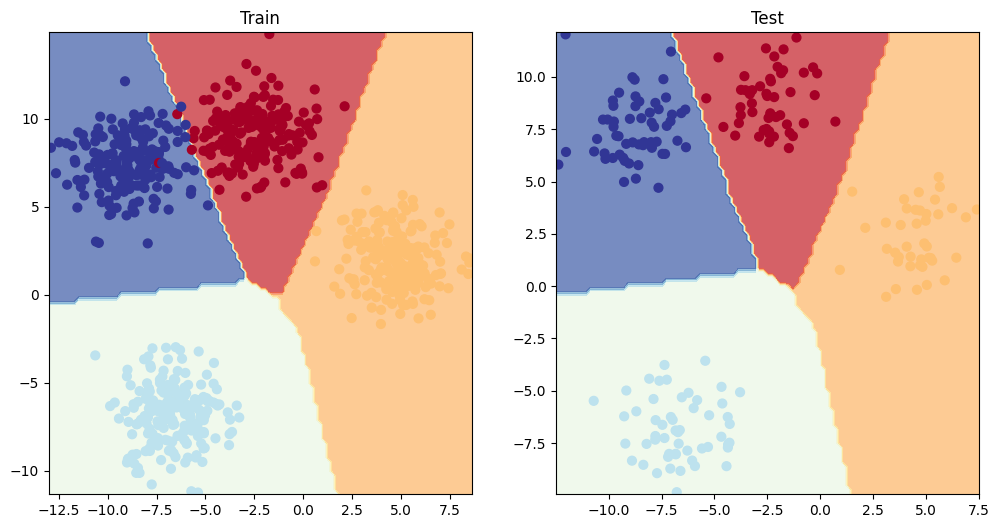

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model4, x_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model4, x_blob_test, y_blob_test)

## 9.0 a few more classification matrices
* Accuracy
* Precision
* Recall
* F1-Score
* confusion matrix
* Classification report

In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 46.2 MB/s eta 0:00:00


In [ ]:
from torchmetrics.classification import MulticlassAccuracy

torch_accr =MulticlassAccuracy( num_classes=4).to(device)

t=torch_accr(y_preds,y_blob_test)

In [ ]:
t

tensor(1., device='cuda:0')